# Exercices sur les D\[M|D\]L de SQL

### Exercice 1 - contraintes sur le club

Compléter le script sql `club_a_completer.sql` qui réalise le schéma relationnel du club rappelé ci-après:

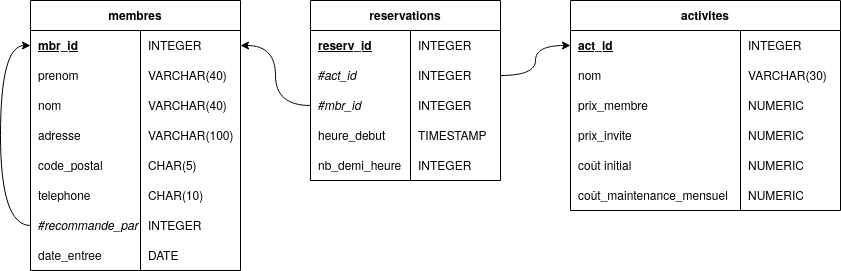

```sql
CREATE TABLE membres (
--  nom col        type         options, contrainte
    mbr_id         serial       PRIMARY KEY,
    prenom         varchar(40)  NOT NULL, 
    nom            varchar(40)  NOT NULL, 
    adresse        varchar(100) NOT NULL, 
    code_postal    char(5)      NOT NULL,
    telephone      char(10)     NOT NULL,
    recommande_par integer      NOT NULL REFERENCES membres (mbr_id),
    date_entree    date         NOT NULL
);

CREATE TABLE activites (
    act_id                   serial      PRIMARY KEY, 
    nom                      varchar(30) NOT NULL,
    prix_membre              numeric     NOT NULL,
    prix_invite              numeric     NOT NULL,
    cout_initial             numeric     NOT NULL,
    cout_maintenance_mensuel numeric     NOT NULL
);

-- une erreur...
CREATE TABLE reservations (
    reserv_id     serial    PRIMARY KEY,
    act_id        integer   NOT NULL REFERENCES activites (act_id),
    mbr_id        integer   NOT NULL REFERENCES membres (mbr_id),
    heure_debut   timestamp NOT NULL,
    nb_demi_heure integer   NOT NULL,
    CHECK (nb_demi_heure >= 1 AND nb_demi_heure <= 6)
);
```

*Note*: `serial` est un entier particulier qui est incrémenté automatiquement lors d'une insertion.

### Exercice 2 - vocabulaire

Regrouper les termes *synonymes* parmi: 

> colonne, entité, champ, domaine, attribut, ligne, champ, schéma, descripteur, base de données, objet, type, *column*, *row*.

- colonne, champ, attribut, descripteur, *column*;

- entité, ligne, objet, *row*;

- domaine, type;

- base de données, schéma;

### Exercice 3 - annuaire sql

On rappelle brièvement le résultat de l'exercice «annuaire»:
```
annuaire(nom , prenom, !num_tel)
```
Donner un ordre SQL permettant de créer cette table avec un maximum de contrainte d'intégrité.

```sql
CREATE TABLE annuaire (
    nom     varchar(50) NOT NULL,
    prenom  varchar(50) NOT NULL,
    num_tel char(10)    PRIMARY KEY,
    UNIQUE (prenom, nom) --discutable, et si une personne a plusieurs téléphones...
); 
```

### Exercice 4 - bulletin sql

On rappelle brièvement le résultat de l'exercice «bulletin»:
```
notes(![#etudiant, #matiere], note)
        
eleves(nom, prenom, !id)

matieres(intitule, !id)
```

1. Donner les ordres SQL permettant de créer ces tables avec un maximum de contrainte d'intégrité. 

```sql
CREATE TABLE eleves (
    nom    varchar(50) NOT NULL,
    prenom varchar(50) NOT NULL,
    id     integer     PRIMARY KEY
);

CREATE TABLE matieres (
    intitule varchar(20) NOT NULL,
    id       integer     PRIMARY KEY
);

CREATE TABLE notes (
    etudiant integer       REFERENCES eleves (id),
    matiere  integer       REFERENCES matieres (id),
    note     decimal(4,2),
    PRIMARY KEY (etudiant, matiere),
    CHECK (note >= 0 and note <= 20)
);
```

2. Donner les ordres SQL permettant de supprimer ces tables une fois qu'elles existent.

```sql
DROP TABLE notes; -- doit être le premier car les autres tables font référence à celle-ci
DROP TABLE matieres;
DROP TABLE notes;
```

### Exercice 5 - Trouver l'erreur

Pour chacun des exemples donnés ci-dessous, dire quelle instruction provoque une erreur en supposant que la base de données ne contient aucune table avant leur exécution.

1. *first*
   ```sql
   DROP TABLE client;
   CREATE TABLE client (cid INT PRIMARY KEY, nom VARCHAR(100),
        prenom VARCHAR(100), points_fidelite INT NOT NULL,
        CHECK (points_fidelite >= 0));
   ```

Bien que mal présenté, ce code SQL est «licite». Le seul problème est que `DROP` produit une erreur si la table client n'existe pas déjà. On devrait plutôt écrire:
```sql
DROP TABLE IF EXISTS client;
```

2. *second*
   ```sql
   CREATE TABLE client (cid INT PRIMARY KEY,
                        nom VARCHAR (100),
                        prenom VARCHAR(100),
                        points_fidelite INT NOT NULL,
                        CHECK (points_fidelite >= 0));
   
   CREATE TABLE commande(
       cid INT REFERENCES client(cid),
       pid INT REFERENCES produit(pid),
       date DATE NOT NULL
   );
   
   CREATE TABLE produit (pid INT PRIMARY KEY, nom VARCHAR(100), prix decimal(10,2));
   ```

Il y a simplement un **problème d'ordre**: la table produit devrait être créée avant la table commande puisque cette dernière y fait référence.

3. *third*
   ```sql
   CREATE TABLE client (
       cid INT PRIMARY KEY,
       nom VARCHAR(100),
       prenom VARCHAR(100),
       points_fidelite INT NOT NULL,
        CHECK (points_fidelite >= 0)
   );
   
   CREATE TABLE produit (
       pid INT PRIMARY KEY,
       nom VARCHAR(100),
       prix NUMERIC(10,2)
   );
   
   CREATE TABLE commande(
    cid INT REFERENCES client(cid),
    nomp VARCHAR(100) 
       REFERENCES produit(nom),
    date DATE NOT NULL
   );
   ```

`nom` de **client** n'a aucune raison d'être *unique* (pas de contrainte UNIQUE) et donc une **commande** pourrait faire référence - `nomp` - à plusieurs lignes de la table **client**... ce n'est pas permis!

4. *fourth*
   ```sql
   CREATE TABLE client (
       cid INT PRIMARY KEY,
       nom VARCHAR(100),
       prenom VARCHAR(100),
       points_fidelite INT NOT NULL,
        CHECK (points_fidelite >= 0)
   );
   
   CREATE TABLE produit (
       pid INT PRIMARY KEY,
       nom VARCHAR(100),
       prix DECIMAL(10,2)
   );
   
   CREATE TABLE commande(
    cid INT REFERENCES client(cid),
    pid INT REFERENCES produit(pid),
    date DATE NOT NULL
   );
   
   INSERT INTO commande VALUES (0, 0, '2020-03-02);
   ```

À ce stade, les tables **client** et **produit** sont vides. Il est impossible d'insérer quoi que ce soit dans **commande** puisque les contraintes de clés étrangères seront violées.

### Exercice 6 - petits joueurs

On considère les deux tables suivantes:

```sql
CREATE TABLE joueurs (jid INT PRIMARY KEY, nom VARCHAR(100) NOT NULL);

CREATE TABLE parties (
    j1 INT REFERENCES joueur(jid),
    j2 INT REFERENCES joueur(jid),
    score1 INT NOT NULL,
    score2 INT NOT NULL,
    CHECK (j1 <> j2)
);
```

1. Ces tables stockent des résultats de parties entre des joueurs. 

   Lister toutes les contraintes d'intégrité et pour chacune donner des ordres SQL violant ces contraintes.

Si on omet les types:
- contrainte de clé primaire: sur jid de joueurs,
- contraintes de clé étrangères: chaque partie fait référence à deux joueurs,
- non nullité: les champs nom, score1 et score2 doivent être précisés,
- contrainte de vérification: une partie ne peut opposé un joueur à lui-même.

2. Modifier les ordres de création de table pour prendre en compte les modifications suivantes:
    - La table **parties** contient en plus une colonne `jour` non nulle, indiquant la date à laquelle la partie à eu lieu.
    - Les scores ne peuvent pas être négatifs;
    - Deux joueurs ne peuvent pas jouer plusieurs fois le même jour.

```sql
CREATE TABLE parties (
    j1 INT REFERENCES joueur(jid),
    j2 INT REFERENCES joueur(jid),
    score1 INT NOT NULL,
    score2 INT NOT NULL,
    jour   DATE NOT NULL,
    CHECK (j1 <> j2),
    CHECK (score1 >= 0 and score2 >= 0),
    UNIQUE (j1, j2, jour)
);
```

Notez qu'en échangeant l'ordre des joueurs, il est possible que deux joueurs s'affrontent deux fois le même jour... (on pourrait exiger `CHECK (j1 < j2)` pour parrer à cela).

### Exercice 7 - Python (CSV vers SQL)

Écrire un programme Python qui lit le fichier CSV *infos.csv* au format suivant:
- les champs sont séparés par des `;`,
- le fichier contient 4 colonnes **nom, prenom, annee_naissance, taille** représentant le nom, prénom, l'année de naissance et la taille (en cm) de personnes.

Votre programme doit écrire dans un fichier *infos.sql* l'ensemble des ordres permettant de:
- créer une table adéquate et contenant en plus un identifiant unique (entier) servant de clé primaire et
- remplir la table avec les données du fichier CSV.

In [ ]:
import os

csv_path = os.path.realpath('infos.csv')
sql_path = os.path.realpath('infos.sql')

table_sql = """CREATE TABLE infos (
    id serial PRIMARY KEY,
    nom varchar(100) NOT NULL,
    prenom varchar(100) NOT NULL,
    annee_naissance DATE NOT NULL,
    taille INT NOT NULL
);
"""

# un gabarit pour l'insertion -> cf. str.format()
insert_tpl = "INSERT INTO infos (nom, prenom, annee_naissance, taille) VALUES ({valeurs});\n"

# collecte des données
with open(csv_path, "r") as csv:
    donnees = []
    for ligne in csv:
        valeurs = ligne.split(";")
        # 
        l = ", ".join(f"'{valeur.strip()}'" for valeur in valeurs[:-1]) + f", {valeurs[-1].strip()}"
        donnees.append(l)

with open(sql_path, "w") as sql:
    sql.write(table_sql)
    for d in donnees:
        sql.write(insert_tpl.format(valeurs=d))